<a href="https://colab.research.google.com/github/AmirGhnbr/multi_factor_models/blob/main/multi_factor_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set_theme(context='talk', style='whitegrid',
              palette='colorblind', color_codes=True,
              rc={'figure.figsize':[12,8]})

## Capital Asset Pricing Model (CAMP)

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import datetime

In [ ]:
now = datetime.datetime.utcnow()

ASSET = "AMZN"
MARKET_BENCHMARK = "^GSPC"
START_DATE = "2016-01-01"
END_DATE = now

In [ ]:
df = yf.download([ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 progress=False)
df.tail(10)

Adj Close                    Close                     High  \
                  AMZN        ^GSPC        AMZN        ^GSPC        AMZN   
Date                                                                       
2023-07-11  128.779999  4439.259766  128.779999  4439.259766  129.770004   
2023-07-12  130.800003  4472.160156  130.800003  4472.160156  131.259995   
2023-07-13  134.300003  4510.040039  134.300003  4510.040039  134.669998   
2023-07-14  134.679993  4505.419922  134.679993  4505.419922  136.649994   
2023-07-17  133.559998  4522.790039  133.559998  4522.790039  135.619995   
2023-07-18  132.830002  4554.979980  132.830002  4554.979980  133.860001   
2023-07-19  135.360001  4565.720215  135.360001  4565.720215  135.990005   
2023-07-20  129.960007  4534.870117  129.960007  4534.870117  134.789993   
2023-07-21  130.000000  4536.339844  130.000000  4536.339844  131.369995   
2023-07-24  128.800003  4554.640137  128.800003  4554.640137  131.660004   

                                Low                     Open               \
                  ^GSPC        AMZN        ^GSPC        AMZN        ^GSPC   
Date                                                                        
2023-07-11  4443.640137  127.349998  4408.459961  127.750000  4415.549805   
2023-07-12  4488.339844  128.830002  4463.229980  130.309998  4467.689941   
2023-07-13  4517.379883  132.710007  4489.359863  134.039993  4491.500000   
2023-07-14  4527.759766  134.059998  4499.560059  134.059998  4514.609863   
2023-07-17  4532.850098  133.210007  4504.899902  134.559998  4508.859863   
2023-07-18  4562.299805  131.350006  4514.589844  132.710007  4521.779785   
2023-07-19  4578.430176  132.529999  4557.479980  133.389999  4563.870117   
2023-07-20  4564.740234  129.330002  4527.560059  134.070007  4554.379883   
2023-07-21  4555.000000  128.419998  4535.790039  131.339996  4550.160156   
2023-07-24  4563.410156  128.350006  4541.290039  130.309998  4543.390137   

               Volume              
                 AMZN       ^GSPC  
Date                               
2023-07-11   49951500  3624220000  
2023-07-12   54022800  3920290000  
2023-07-13   61170900  3839530000  
2023-07-14   54388100  3647450000  
2023-07-17   48450200  3538240000  
2023-07-18   54969100  4090010000  
2023-07-19   54531000  4115670000  
2023-07-20   59820600  3761770000  
2023-07-21  133265000  3570190000  
2023-07-24   45591100  3856250000

### Resample to monthly data and calculate simple returns

In [ ]:
X = (
    df['Adj Close']
    .rename(columns={ASSET: 'asset',
                     MARKET_BENCHMARK: 'market'})
    .resample('M')
    .last()
    .pct_change()
    .dropna()
    )
X.tail(10)

,asset,market
Date,,
2022-10-31,-0.093451,0.079863
2022-11-30,-0.057595,0.053753
2022-12-31,-0.129894,-0.058971
2023-01-31,0.227738,0.061753
2023-02-28,-0.086299,-0.026112
2023-03-31,0.096148,0.035052
2023-04-30,0.020912,0.014642
2023-05-31,0.143480,0.002482
2023-06-30,0.081108,0.064727


## Callculate the beta the coefficient of expected market return - risk free rate

In [ ]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta_coeff = covariance / benchmark_variance
beta_coeff

1.264652932242752

the beta is positive which means the asset moves the same direction as market moves but 1.26 times more than the market movement

In [ ]:
# separate target
y = X.pop("asset")

# add constant
X = sm.add_constant(X)
# print(X)
# define and fit the regression model
capm_model = sm.OLS(y, X).fit()

# print results
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     60.17
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.45e-11
Time:                        12:03:07   Log-Likelihood:                 111.90
No. Observations:                  90   AIC:                            -219.8
Df Residuals:                      88   BIC:                            -214.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.008      0.944      0.3

in the equation above supposed the risk-free rate = 0

## Calculate the CAMP with rf

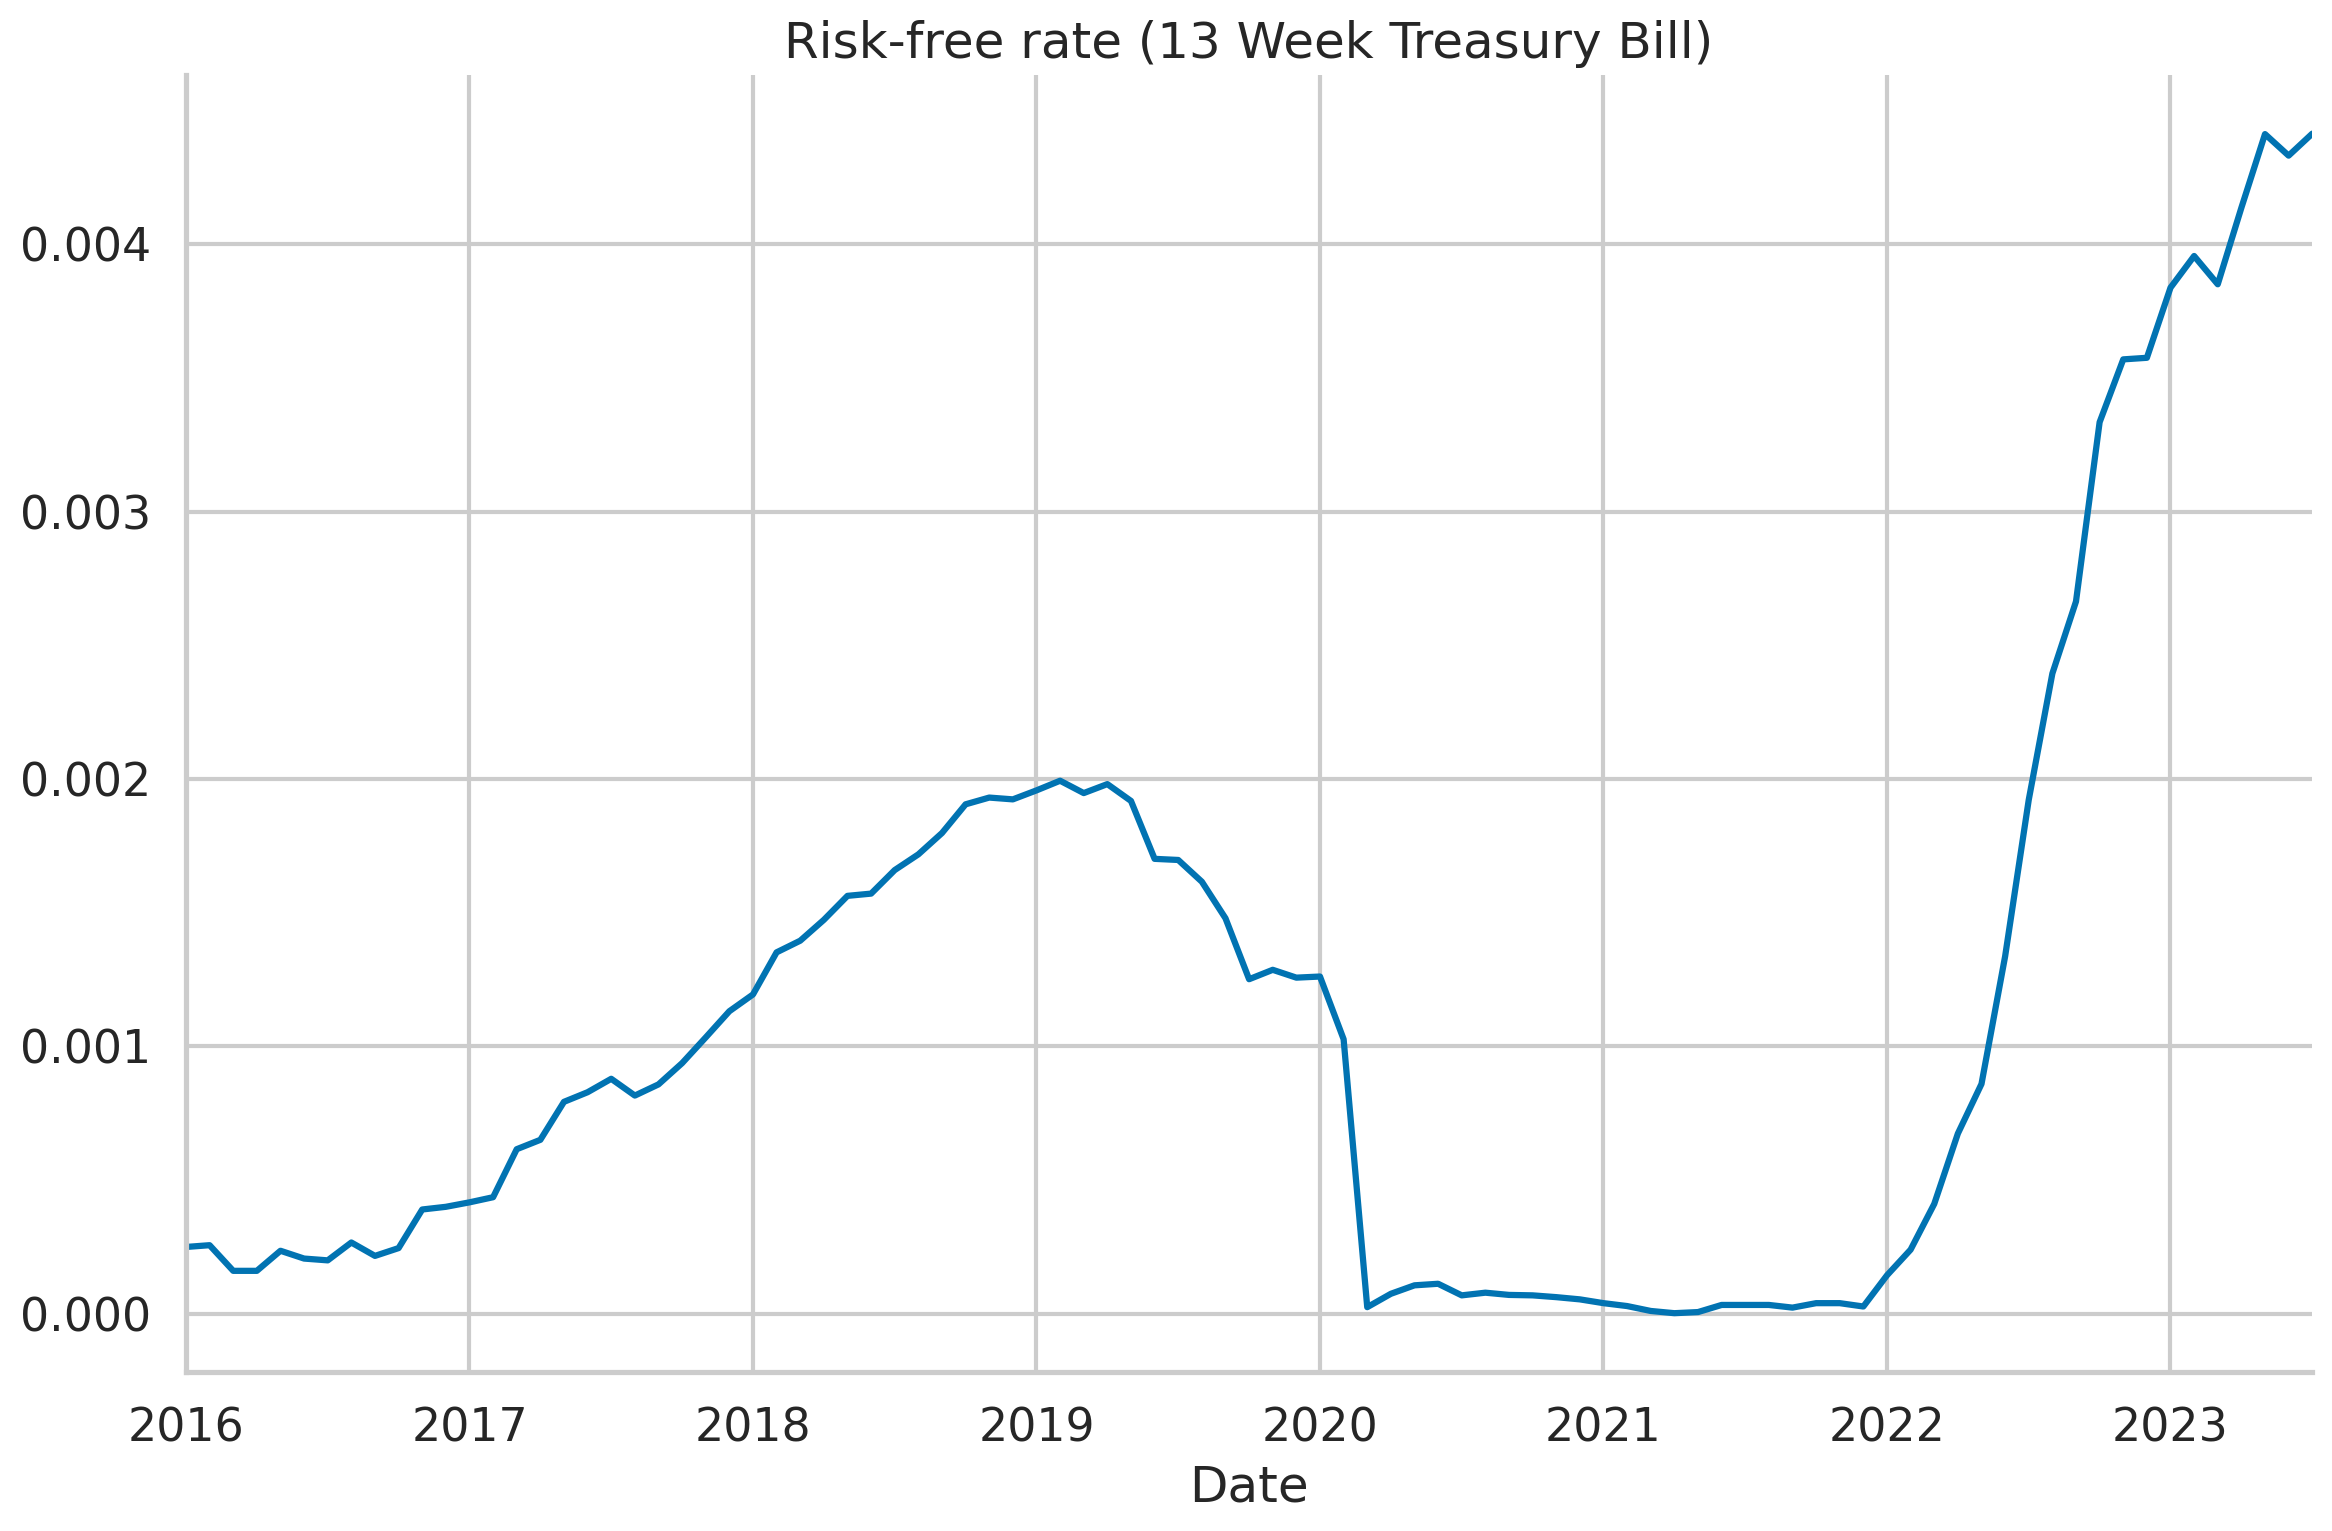

In [ ]:
N_DAYS = 90

# download data from Yahoo finance
df_rf = yf.download("^IRX",
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# resample to monthly by taking last value from each month
rf = df_rf.resample("M").last().Close / 100

# calculate the corresponding daily risk-free return
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)

# convert to monthly and subtract 1
rf = (rf ** 30) - 1

# plot the risk-free rate
rf.plot(title="Risk-free rate (13 Week Treasury Bill)")

sns.despine()
plt.tight_layout()

In [ ]:
rf.tail()

Date
2023-03-31    0.003850
2023-04-30    0.004136
2023-05-31    0.004412
2023-06-30    0.004331
2023-07-31    0.004414
Freq: M, Name: Close, dtype: float64

In [ ]:
rf_data = pd.DataFrame(rf)
rf_data

,Close
Date,
2016-01-31,0.000250
2016-02-29,0.000257
2016-03-31,0.000161
2016-04-30,0.000161
2016-05-31,0.000236
...,...
2023-03-31,0.003850
2023-04-30,0.004136
2023-05-31,0.004412


In [ ]:
X = (
    df['Adj Close']
    .rename(columns={ASSET: 'asset',
                     MARKET_BENCHMARK: 'market'})
    .resample('M')
    .last()
    .pct_change()
    .dropna()
    )


In [ ]:
X.tail()

,asset,market
Date,,
2023-03-31,0.096148,0.035052
2023-04-30,0.020912,0.014642
2023-05-31,0.143480,0.002482
2023-06-30,0.081108,0.064727
2023-07-31,-0.011967,0.023427


In [ ]:
X.market -= rf_data['Close']
X.tail()

,asset,market
Date,,
2023-03-31,0.096148,0.031201
2023-04-30,0.020912,0.010506
2023-05-31,0.143480,-0.001930
2023-06-30,0.081108,0.060396
2023-07-31,-0.011967,0.019014


In [ ]:
import statsmodels.formula.api as smf

capm_model = smf.ols(formula="asset ~ market", data=X).fit()

# print results
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     60.22
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.43e-11
Time:                        12:17:39   Log-Likelihood:                 111.92
No. Observations:                  90   AIC:                            -219.8
Df Residuals:                      88   BIC:                            -214.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0087      0.008      1.145      0.2

## Estimating the Fama-French three-factor model

In [ ]:
import pandas_datareader.data as web

In [ ]:
ASSET